In [75]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Wczytanie Danych

## Zbiór imports-85.csv

Przy pomocy biblioteki pandas, wczytany zostanie zbiór imports-85.csv. 

In [45]:
imports = pd.read_csv("./datasets/imports-85.csv")
imports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

Po wypisaniu komendy imports.info() dowiadujemy się, że istnieje wiele kolumn, które nie są typu liczbowego.

In [46]:
label_encoder = LabelEncoder()
for column in imports.columns:
    if imports[column].dtype == 'object':
        imports[column] = label_encoder.fit_transform(imports[column])

imports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    int32  
 3   fuel-type          205 non-null    int32  
 4   aspiration         205 non-null    int32  
 5   num-of-doors       205 non-null    int32  
 6   body-style         205 non-null    int32  
 7   drive-wheels       205 non-null    int32  
 8   engine-location    205 non-null    int32  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int32  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

Przy wykorzystaniu LabelEncoder z bibilioteki scikit-learn zmienilismy dane typu string na liczbowe.

In [47]:
imports_dr = imports.dropna()
imports_dr.describe()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.0,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.737500,121.300000,12.975000,0.906250,0.17500,0.412500,2.656250,1.237500,0.0,98.235625,...,119.093750,2.918750,3.298437,3.237313,10.145125,95.875000,5116.250000,26.506250,32.068750,11427.681250
std,1.189511,35.602417,6.136754,0.292396,0.38116,0.506406,0.761056,0.531847,0.0,5.163763,...,30.411186,2.031116,0.267348,0.294210,3.882507,30.625708,465.290536,6.081208,6.440948,5863.789011
min,-2.000000,65.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,8.000000,1.000000,0.00000,0.000000,2.000000,1.000000,0.0,94.500000,...,97.000000,1.000000,3.050000,3.107500,8.700000,69.000000,4800.000000,23.000000,28.000000,7383.500000
50%,1.000000,114.000000,13.000000,1.000000,0.00000,0.000000,3.000000,1.000000,0.0,96.900000,...,110.000000,3.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9164.000000
75%,2.000000,148.000000,19.000000,1.000000,0.00000,1.000000,3.000000,2.000000,0.0,100.600000,...,134.500000,5.000000,3.550000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14559.250000
max,3.000000,256.000000,21.000000,1.000000,1.00000,2.000000,4.000000,2.000000,0.0,115.600000,...,258.000000,6.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


Powyżej zostały usunięte wszystkie rekordy ze zbioru danych zawierające wartości NaN.

In [48]:
imports_dr = imports_dr.drop('engine-location', axis=1)

Zauważyliśmy, że kolumna engine-location jest stała dla wszystkich rekordów. Postanowiliśmy ją usunąć.

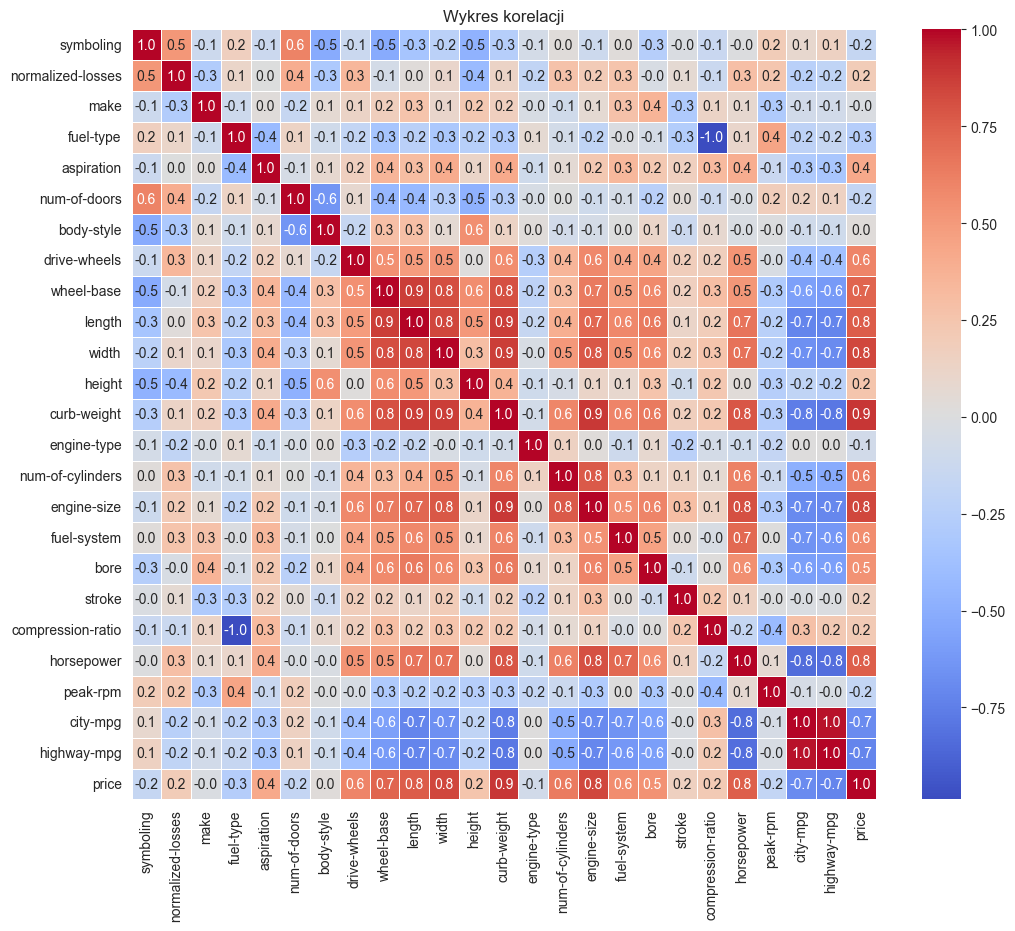

In [49]:
plt.figure(figsize=(12,10))
corr_matrix = imports_dr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title("Wykres korelacji")
plt.show()

# 2. Selekcja zmiennych

## Ręczna selekcja zmiennych.

In [50]:
m1 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop('price', axis=1))).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     46.41
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.47e-53
Time:                        12:12:45   Log-Likelihood:                -1436.8
No. Observations:                 160   AIC:                             2924.
Df Residuals:                     135   BIC:                             3000.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.288e+04   1.75e+0

Powyżej został stworzony model względem zmiennej 'price'. R-suqared aktualnego modelu to 0.892. Adj. R-squared - 0.873

In [51]:
m2 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop(['price','length'], axis=1))).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     48.78
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           2.09e-54
Time:                        12:12:45   Log-Likelihood:                -1436.8
No. Observations:                 160   AIC:                             2922.
Df Residuals:                     136   BIC:                             2995.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.264e+04   1.73e+0

Teraz została usunięta zmienna length z wartością P-value na poziomie 0.905. R-squared - 0.892. Adj. R-squared - 0.874

In [52]:
m3 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop(['price', 'length', 'symboling'], axis=1))).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     51.32
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           3.08e-55
Time:                        12:12:45   Log-Likelihood:                -1436.9
No. Observations:                 160   AIC:                             2920.
Df Residuals:                     137   BIC:                             2991.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -6.34e+04   1.72e+0

Teraz została usunięta zmienna symboling z P-value - 0.710. R-squared - 0.892. Adj. R-squared - 0.874

In [53]:
m4 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop(['price', 'length', 'symboling', 'bore'], axis=1))).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     54.07
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           4.53e-56
Time:                        12:12:45   Log-Likelihood:                -1437.0
No. Observations:                 160   AIC:                             2918.
Df Residuals:                     138   BIC:                             2986.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.053e+04   1.58e+0

Została usunięta zmienna bore z P-value - 0.665. R-squared - 0.892. Adj. R-squared - 0.875

In [54]:
m5 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop(['price', 'length', 'symboling', 'bore', 'highway-mpg'], axis=1))).fit()
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     57.10
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           6.45e-57
Time:                        12:12:45   Log-Likelihood:                -1437.1
No. Observations:                 160   AIC:                             2916.
Df Residuals:                     139   BIC:                             2981.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5.971e+04   1.56e+0

Została usunięta zmienna 'highway-mpg' z P-value 0.673. R-squared - 0.891. Adj. R-squared - 0.876

In [55]:
m6 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop(['price', 'length', 'symboling', 'bore', 'highway-mpg', 'peak-rpm'], axis=1))).fit()
print(m6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     60.47
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           8.78e-58
Time:                        12:12:45   Log-Likelihood:                -1437.2
No. Observations:                 160   AIC:                             2914.
Df Residuals:                     140   BIC:                             2976.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5.912e+04   1.55e+0

Została usunięta zmienna 'peak-rpm' z P-value 0.701. R-squared - 0.891. Adj. R-squared - 0.877

In [56]:
m7 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop(['price', 'length', 'symboling', 'bore', 'highway-mpg', 'peak-rpm', 'wheel-base'], axis=1))).fit()
print(m7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     64.04
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.36e-58
Time:                        12:12:45   Log-Likelihood:                -1437.5
No. Observations:                 160   AIC:                             2913.
Df Residuals:                     141   BIC:                             2971.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5.962e+04   1.55e+0

Została usunięta zmienna 'wheel-base' z P-value 0.494. R-squared - 0.891. Adj. R-squared - 0.877

In [57]:
m8 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop(['price', 'length', 'symboling', 'bore', 'highway-mpg', 'peak-rpm', 'wheel-base', 'city-mpg'], axis=1))).fit()
print(m8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     68.08
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.96e-59
Time:                        12:12:45   Log-Likelihood:                -1437.7
No. Observations:                 160   AIC:                             2911.
Df Residuals:                     142   BIC:                             2967.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.214e+04   1.49e+0

Została usunięta zmienna 'city-mpg' z P-value 0.533. R-squared - 0.891. Adj. R-squared - 0.878

In [58]:
m9 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop(['price', 'length', 'symboling', 'bore', 'highway-mpg', 'peak-rpm', 'wheel-base', 'city-mpg', 'normalized-losses'], axis=1))).fit()
print(m9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     72.48
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           3.10e-60
Time:                        12:12:45   Log-Likelihood:                -1438.0
No. Observations:                 160   AIC:                             2910.
Df Residuals:                     143   BIC:                             2962.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.542e+04   1.43e+0

Została usunięta zmienna 'normalized-losses' z P-value 0.427. R-squared - 0.890. Adj. R-squared - 0.878

In [59]:
m10 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop(['price', 'length', 'symboling', 'bore', 'highway-mpg', 'peak-rpm', 'wheel-base', 'city-mpg', 'normalized-losses', 'horsepower'], axis=1))).fit()
print(m10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     77.35
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           5.16e-61
Time:                        12:12:45   Log-Likelihood:                -1438.5
No. Observations:                 160   AIC:                             2909.
Df Residuals:                     144   BIC:                             2958.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.403e+04   1.42e+0

Została usunięta zmienna 'horsepower' z P-value 0.368. R-squared - 0.890. Adj. R-squared - 0.878

In [60]:
m11 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop(['price', 'length', 'symboling', 'bore', 'highway-mpg', 'peak-rpm', 'wheel-base', 'city-mpg', 'normalized-losses', 'horsepower', 'num-of-doors'], axis=1))).fit()
print(m11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     82.34
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.31e-61
Time:                        12:12:45   Log-Likelihood:                -1439.4
No. Observations:                 160   AIC:                             2909.
Df Residuals:                     145   BIC:                             2955.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.808e+04   1.39e+0

Została usunięta zmienna 'num-of-doors' z P-value 0.190. R-squared - 0.888. Adj. R-squared - 0.877

In [61]:
m12 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop(['price', 'length', 'symboling', 'bore', 'highway-mpg', 'peak-rpm', 'wheel-base', 'city-mpg', 'normalized-losses', 'horsepower', 'num-of-doors', 'engine-type'], axis=1))).fit()
print(m12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     88.09
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           3.21e-62
Time:                        12:12:45   Log-Likelihood:                -1440.4
No. Observations:                 160   AIC:                             2909.
Df Residuals:                     146   BIC:                             2952.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.983e+04   1.39e+0

Została usunięta zmienna 'engine-type' z P-value 0.189. R-squared - 0.887. Adj. R-squared - 0.877

In [62]:
m13 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop(['price', 'length', 'symboling', 'bore', 'highway-mpg', 'peak-rpm', 'wheel-base', 'city-mpg', 'normalized-losses', 'horsepower', 'num-of-doors', 'engine-type', 'engine-size'], axis=1))).fit()
print(m13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     94.83
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           7.45e-63
Time:                        12:12:45   Log-Likelihood:                -1441.3
No. Observations:                 160   AIC:                             2909.
Df Residuals:                     147   BIC:                             2949.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -6.96e+04   1.39e+0

Została usunięta zmienna 'engine-size' z P-value 0.194. R-squared - 0.886. Adj. R-squared - 0.876

In [63]:
m14 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop(['price', 'length', 'symboling', 'bore', 'highway-mpg', 'peak-rpm', 'wheel-base', 'city-mpg', 'normalized-losses', 'horsepower', 'num-of-doors', 'engine-type', 'engine-size', 'height'], axis=1))).fit()
print(m14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     103.0
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.44e-63
Time:                        12:12:45   Log-Likelihood:                -1442.1
No. Observations:                 160   AIC:                             2908.
Df Residuals:                     148   BIC:                             2945.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.413e+04   1.31e+0

Została usunięta zmienna 'height' z P-value 0.235. R-squared - 0.884. Adj. R-squared - 0.876

In [64]:
m15 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop(['price', 'length', 'symboling', 'bore', 'highway-mpg', 'peak-rpm', 'wheel-base', 'city-mpg', 'normalized-losses', 'horsepower', 'num-of-doors', 'engine-type', 'engine-size', 'height', 'body-style'], axis=1))).fit()
print(m15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     112.4
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           3.56e-64
Time:                        12:12:45   Log-Likelihood:                -1443.2
No. Observations:                 160   AIC:                             2908.
Df Residuals:                     149   BIC:                             2942.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -6.63e+04   1.31e+0

Została usunięta zmienna 'body-style' z P-value 0.159. R-squared - 0.883. Adj. R-squared - 0.875

In [65]:
m16 = sm.OLS(imports_dr['price'], sm.add_constant(imports_dr.drop(['price', 'length', 'symboling', 'bore', 'highway-mpg', 'peak-rpm', 'wheel-base', 'city-mpg', 'normalized-losses', 'horsepower', 'num-of-doors', 'engine-type', 'engine-size', 'height', 'body-style', 'fuel-system'],axis=1))).fit()
print(m16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     123.3
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.07e-64
Time:                        12:12:45   Log-Likelihood:                -1444.5
No. Observations:                 160   AIC:                             2909.
Df Residuals:                     150   BIC:                             2940.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.681e+04   1.32e+0

Została usunięta zmienna 'fuel-system' z P-value 0.116. R-squared - 0.881. Adj. R-squared - 0.874

Wszystkie P-value są mniejsze od 0.1, więc w tym momencie kończymy usuwanie zmiennych dla tego modelu. 

In [66]:
print("R-squared dla modelu m1: ", m1.rsquared)
print("R-squared adjusted dla modelu m1: ", m1.rsquared_adj)
print("R-squared dla modelu m16: ", m16.rsquared)
print("R-squared adjusted dla modelu m16: ", m16.rsquared_adj)

R-squared dla modelu m1:  0.8919035375002127
R-squared adjusted dla modelu m1:  0.8726863886113616
R-squared dla modelu m16:  0.8809629870839696
R-squared adjusted dla modelu m16:  0.8738207663090077


Powyżej widać, że R-squared zmniejszyło się znacząco, lecz R-squared adjusted lekko się zwiększyło. W tym wypadku model mniejszy (m16) powinien być lepszy od m1, lecz należy to sprawdzić testem-f.

Do f-testu mamy dwie hipotezy:

H0: modele są podobne

H1: istnieje istotna różnica pomiędzy modelami

In [67]:
f,p_value,_ = m1.compare_f_test(m16)
print(p_value)

0.5536963120908791


Jeżeli p-value < 0.05 wtedy odrzucamy h0. W naszym przypadku p-value jest większe. Z tego względu nie możemy odrzucić h0, czyli model mniejszy przewiduje podobnie dobrze jak model większy, ale ma mniej zmiennych, czyli powinien liczyć szybciej.

Do porównania p-value obu modeli użyliśmy testu-f, który działa na takiej samej zasadzie jak test ANOVA (w tym przypadku). (https://en.wikipedia.org/wiki/F-test)

## Zachłanna minimalizacja w przód i w tył

In [72]:
X = imports_dr.drop('price',axis=1)
y = imports_dr['price']
model = linear_model.LinearRegression()
sfs = SequentialFeatureSelector(model,
                                k_features='best',
                                forward=True,
                                scoring='neg_mean_squared_error',
                                cv=10)
sfs.fit(X, y)
selected_features = list(X.columns[list(sfs.k_feature_idx_)])

X_selected = sm.add_constant(X[selected_features])
model = sm.OLS(y, X_selected)
wprzod = model.fit()

print(wprzod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     154.4
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           9.47e-66
Time:                        12:14:58   Log-Likelihood:                -1447.3
No. Observations:                 160   AIC:                             2911.
Df Residuals:                     152   BIC:                             2935.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.853e+04   1.03e+04  

In [71]:
X = imports_dr.drop('price',axis=1)
y = imports_dr['price']
model = linear_model.LinearRegression()
sfs = SequentialFeatureSelector(model,
                                k_features='best',
                                forward=False,
                                scoring='neg_mean_squared_error',
                                cv=10)
sfs.fit(X, y)
selected_features = list(X.columns[list(sfs.k_feature_idx_)])

X_selected = sm.add_constant(X[selected_features])
model = sm.OLS(y, X_selected)
wtyl = model.fit()

print(wtyl.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     134.3
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           8.86e-62
Time:                        12:14:55   Log-Likelihood:                -1457.0
No. Observations:                 160   AIC:                             2930.
Df Residuals:                     152   BIC:                             2955.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.525e+04   9905.24

In [73]:
f,p_value,_ = m1.compare_f_test(wprzod)
print(p_value)

0.3444721747642957


In [74]:
f,p_value,_ = m1.compare_f_test(wtyl)
print(p_value)

0.0047053241805362295


Zachłanna minimalizacja w przód oraz w tył została wykonana przy użyciu funkcji SequentialFeatureSelector. Pozwala ona na dostosowanie takich parametrów jak - wybór modelu liniowego (w naszym przypadku modelu regresji liniowej), kierunku przetwarzania (w przód/tył), ilości porządanych zmiennych (wartość można określić, lecz my wybraliśmy opcję 'best'), oceny predykatów o najmniejszym MSE, oraz walidacji krzyżowej, która określa strategię dzielenia (na ile części zostanie podzielony zbiór treningowy)
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html

Porównując otrzymane wyniki zachłannej minimalizacji w przód oraz w tył z wcześniej stworzonym modelem m1 otrzymaliśmy następujące wyniki:

P-value w przód: 0.3445

P-value w tył: 0.004705

Co oznacza, że w przypadku modelu w przód nie ma podstaw do odrzucenia hipotezy H0. (model nie jest gorszy niż m1)

Natomiast w przypadku modelu w tył są już podstawy do odrzucenia hipotezy H0 oraz przyjęcia hipotezy H1, ze względu na otrzymaną p-wartość < 0.05.

Analizując wartości R-squared można przyjąć, że ręcznie stworzony model jest lepiej dopasowany. 

## PCA

In [89]:
scaler = StandardScaler()
imports_scaled = scaler.fit_transform(imports_dr)

pca = PCA()
pca.fit(imports_scaled)

wariancja = pca.explained_variance_ratio_
calkowita_wariancja = wariancja.cumsum()

n_components = np.argmax(calkowita_wariancja >= 0.95) + 1 # wybor maksymalnej liczby nowych zmiennych
pca = PCA(n_components=n_components)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='-', color='b')
plt.title('Wykres osypiska (Scree Plot)')
plt.xlabel('Numer wartości własnej')
plt.ylabel('Wartość własna')
plt.show()

AttributeError: 'PCA' object has no attribute 'explained_variance_'

<Figure size 1000x600 with 0 Axes>

Po analizie wykresu osypiska widać, że PCA stworzyło za dużo zmiennych. Osypisko kończy się przy zmiennej 8. Poniżej tworzymy lepszy model z mniejszą ilością zmiennych. 

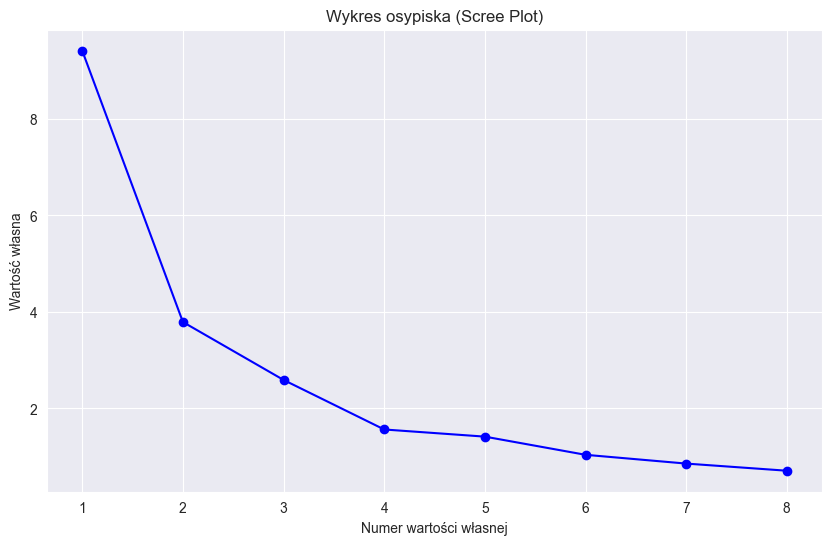

In [90]:
n_components = 8 # wybor maksymalnej liczby nowych zmiennych
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(imports_scaled)

X_pca_with_const = sm.add_constant(X_pca)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='-', color='b')
plt.title('Wykres osypiska (Scree Plot)')
plt.xlabel('Numer wartości własnej')
plt.ylabel('Wartość własna')
plt.show()

In [91]:
model = sm.OLS(imports_dr['price'], X_pca_with_const)
pca = model.fit()
print(pca.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     134.4
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.13e-64
Time:                        13:19:12   Log-Likelihood:                -1447.2
No. Observations:                 160   AIC:                             2912.
Df Residuals:                     151   BIC:                             2940.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.143e+04    166.943     68.453      0.0

Końcowe R-squared naszego modelu to 0.865, a Adj R-squared to 0.860

In [92]:
f,p_value,_ = m1.compare_f_test(pca)
print(p_value)

0.2949812731939881


Wykonując f-test dla pca oraz modelu m1, można stwierdzić, że nie ma podstaw do odrzucenia hipotezy H0.